In [0]:
import torch
import numpy as np
import pandas as pd
import os
import tqdm
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.listdir('/content/drive/My Drive/DATA')

['testx',
 'validationx',
 'trainx',
 'trainy_mod',
 'validationy_mod',
 'testy_mod']

In [0]:
data_path='/content/drive/My Drive/DATA/'

In [0]:
os.listdir(data_path+'trainx')[:5],os.listdir(data_path+'trainy_mod')[:5]

(['imgx19.jpg', 'imgx190.jpg', 'imgx1902.jpg', 'imgx1905.jpg', 'imgx1900.jpg'],
 ['imgy19.png',
  'imgy1901.png',
  'imgy1904.png',
  'imgy1906.png',
  'imgy1902.png'])

In [0]:
train_x=['trainx/'+i for i in os.listdir(data_path+'trainx')]
train_x.sort()
train_y=['trainy_mod/'+i for i in os.listdir(data_path+'trainy_mod')]
train_y.sort()
val_x=['validationx/'+i for i in os.listdir(data_path+'validationx')]
val_x.sort()
val_y=['validationy_mod/'+i for i in os.listdir(data_path+'validationy_mod')]
val_y.sort()
test_x=['testx/'+i for i in os.listdir(data_path+'testx')]
test_x.sort()
test_y=['testy_mod/'+i for i in os.listdir(data_path+'testy_mod')]
test_y.sort()

In [0]:
from torchvision import transforms

In [0]:
from PIL import Image

In [0]:
tfm=transforms.ToTensor()


In [0]:
data_aug_x=torch.zeros(len(train_x)*4,3,192,256)
data_aug_y=torch.zeros(len(train_x)*4,192,256)
for i in tqdm.tqdm(range(1000)):
  tmp=Image.open(data_path + train_x[i+1000]);
  data_aug_x[4*i]=tfm(tmp)
  data_aug_x[4*i+1]=tfm(tmp.rotate(180))
  data_aug_x[4*i+2]=tfm(tmp.transpose(PIL.Image.FLIP_LEFT_RIGHT))
  data_aug_x[4*i+3]=tfm(tmp.transpose(PIL.Image.FLIP_TOP_BOTTOM))
  tmp2=Image.open(data_path + train_y[i+1000]);
  data_aug_y[4*i]=tfm(tmp2)
  data_aug_y[4*i+1]=tfm(tmp2.rotate(180))
  data_aug_y[4*i+2]=tfm(tmp2.transpose(PIL.Image.FLIP_LEFT_RIGHT))
  data_aug_y[4*i+3]=tfm(tmp2.transpose(PIL.Image.FLIP_TOP_BOTTOM))  

100%|██████████| 1000/1000 [17:01<00:00,  1.07it/s]


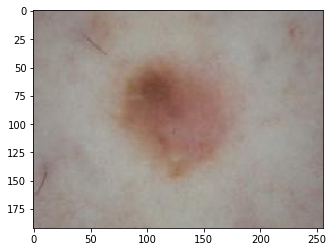

In [0]:
plt.imshow(im)

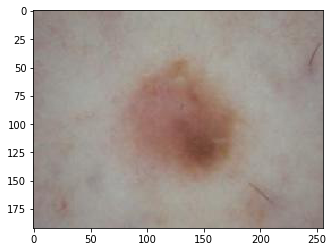

In [0]:
im=Image.open(data_path + train_x[1])
plt.imshow(im.rotate(180))

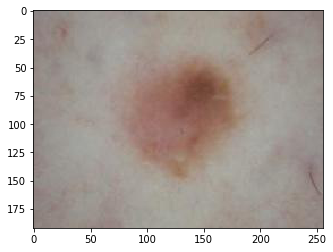

In [0]:
out = im.transpose(PIL.Image.FLIP_LEFT_RIGHT)
plt.imshow(out)

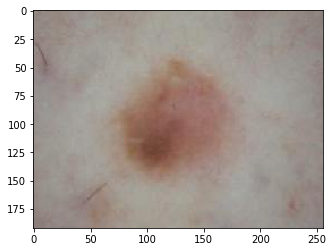

In [0]:
plt.imshow(im.transpose(PIL.Image.FLIP_TOP_BOTTOM))

In [0]:
# train_x=os.listdir(data_path+'trainx')
# train_x.sort()
# train_y=os.listdir(data_path+'trainy_mod')
# train_y.sort()
# val_x=os.listdir(data_path+'validationx')
# val_x.sort()
# val_y= os.listdir(data_path+'validationy_mod')
# val_y.sort()
# test_x=os.listdir(data_path+'testx')
# test_x.sort()
# test_y=os.listdir(data_path+'testy_mod')
# test_y.sort()

In [0]:
train_x[:5],train_y[:5]

(['trainx/imgx1.jpg',
  'trainx/imgx10.jpg',
  'trainx/imgx100.jpg',
  'trainx/imgx1000.jpg',
  'trainx/imgx1001.jpg'],
 ['trainy_mod/imgy1.png',
  'trainy_mod/imgy10.png',
  'trainy_mod/imgy100.png',
  'trainy_mod/imgy1000.png',
  'trainy_mod/imgy1001.png'])

In [0]:
train_data=pd.DataFrame({'x':train_x,'y':train_y})
val_data=pd.DataFrame({'x':val_x,'y':val_y})
test_data=pd.DataFrame({'x':test_x,'y':test_y})

In [0]:
train_data.tail()

,x,y
1995,trainx/imgx995.jpg,trainy_mod/imgy995.png
1996,trainx/imgx996.jpg,trainy_mod/imgy996.png
1997,trainx/imgx997.jpg,trainy_mod/imgy997.png
1998,trainx/imgx998.jpg,trainy_mod/imgy998.png
1999,trainx/imgx999.jpg,trainy_mod/imgy999.png


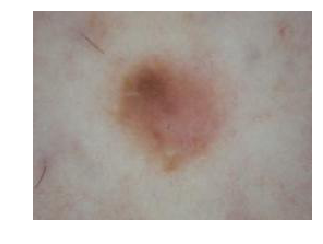

In [0]:
img = open_image(data_path+'/'+train_data['x'][1])
img.show(figsize=(5,5))

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img=mpimg.imread(data_path+str(train_data['x'][3]))
# imgplot = p}lt.imshow(img)
# plt.show()
# tmp=img.shape
# plt.imshow()

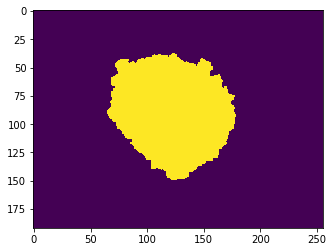

(192, 256)

In [0]:
img=mpimg.imread(data_path+train_data['y'][1])
imgplot = plt.imshow(img)
plt.show()
img.shape

In [0]:
img

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32)

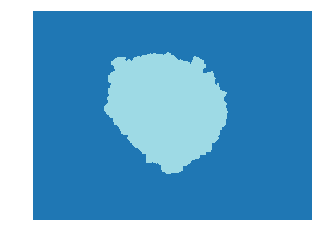

In [0]:
mask = open_mask(data_path+'trainy_mod/'+train_data['y'][1])
mask.show(figsize=(5,5), alpha=1)

In [0]:
train_img_x=torch.zeros(len(train_data),192,256,3)
for i in tqdm.tqdm(range(len(train_data))):
  train_img_x[i]=torch.tensor(mpimg.imread(data_path+str(train_data['x'][i])))
  
train_img_y=torch.zeros(len(train_data),192,256)
for i in tqdm.tqdm(range(len(train_data))):
  train_img_y[i]=torch.tensor(mpimg.imread(data_path+str(train_data['y'][i])))  

100%|██████████| 2000/2000 [18:18<00:00,  2.04it/s]


In [0]:
val_img_x=torch.zeros(len(val_x),192,256,3)
for i in tqdm.tqdm(range(len(val_x))):
  val_img_x[i]=torch.tensor(mpimg.imread(data_path+str(val_x[i])))

val_img_y=torch.zeros(len(val_y),192,256)
for i in tqdm.tqdm(range(len(val_x))):
  val_img_y[i]=torch.tensor(mpimg.imread(data_path+str(val_y[i])))


100%|██████████| 150/150 [00:48<00:00,  3.73it/s]


In [0]:
data_aug_x.shape,data_aug_y.shape

(torch.Size([8000, 3, 192, 256]), torch.Size([8000, 192, 256]))

In [0]:
val_img_x=val_img_x.permute(0,3,1,2)

NameError: ignored

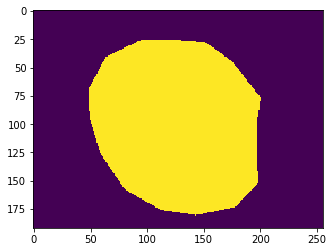

In [0]:
plt.imshow(data_aug_y[0])

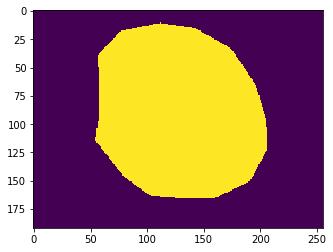

In [0]:
plt.imshow(data_aug_y[1])

In [0]:
import pickle 
with open("/content/drive/My Drive/cancer_aug_12.pkl",mode='wb') as f:
  pickle.dump((data_aug_x,data_aug_y),f,protocol=4)

In [0]:
with open("/content/drive/My Drive/cancer_aug_2.pkl",mode='wb') as f:
  pickle.dump((data_aug_x[2000:],data_aug_y[2000:]),f,protocol=4)

In [0]:
test_img_x=torch.zeros(len(test_data),192,256,3)
for i in tqdm.tqdm(range(len(test_data))):
  test_img_x[i]=mpimg.imread(data_path+str(test_data['x'][i]))

test_img_y=torch.zeros(len(test_data),192,256)
for i in tqdm.tqdm(range(len(test_data))):
  test_img_y[i]=mpimg.imread(data_path+str(test_data['y'][i]))


In [0]:
train_img_x,train_img_y,val_img_x,val_img_y=pickle.load(open('/content/drive/My Drive/cancer.pkl',mode='rb'))

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        #  would be a nice idea if the upsampling could be learned too,
        #  but my machine do not have enough memory to handle all those weights
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch//2, in_ch//2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))
        
        # for padding issues, see 
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x

In [0]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.inc = inconv(n_channels, 64)
        self.down1 = down(64, 128)
        self.down2 = down(128, 256)
        self.down3 = down(256, 512)
        self.down4 = down(512, 512)
        self.up1 = up(1024, 256)
        self.up2 = up(512, 128)
        self.up3 = up(256, 64)
        self.up4 = up(128, 64)
        self.outc = outconv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return x

In [0]:
# unet = UNet(in_channel=3,out_channel=1)
unet = UNet(n_channels=3, n_classes=1)

In [0]:
train_img_x.shape

torch.Size([2000, 3, 192, 256])

In [0]:
# with open("/content/drive/My Drive/cancer.pkl", mode='wb') as f:
#   pickle.dump((train_img_x, train_img_y, val_img_x, val_img_y), f)

In [0]:
train_img_x[0].squeeze(0)

tensor([[[170., 158., 159.,  ..., 162., 165., 172.],
         [159., 147., 148.,  ..., 154., 157., 164.],
         [158., 145., 146.,  ..., 154., 157., 164.],
         ...,
         [171., 165., 162.,  ..., 182., 184., 189.],
         [172., 166., 163.,  ..., 183., 186., 191.],
         [181., 175., 172.,  ..., 188., 190., 195.]],

        [[203., 191., 191.,  ..., 208., 211., 218.],
         [192., 180., 180.,  ..., 200., 203., 210.],
         [192., 179., 180.,  ..., 200., 203., 210.],
         ...,
         [209., 203., 200.,  ..., 223., 225., 230.],
         [210., 204., 201.,  ..., 224., 227., 232.],
         [219., 213., 210.,  ..., 229., 231., 236.]],

        [[238., 226., 229.,  ..., 244., 245., 252.],
         [227., 215., 218.,  ..., 236., 237., 244.],
         [229., 216., 218.,  ..., 236., 237., 244.],
         ...,
         [246., 242., 239.,  ..., 245., 247., 252.],
         [247., 241., 238.,  ..., 246., 249., 254.],
         [255., 250., 247.,  ..., 251., 253., 255.]]]

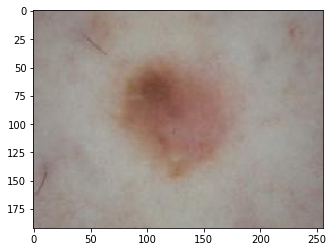

In [0]:
plt.imshow(train_img_x[1].squeeze(0).permute(1, 2, 0)/255.0)


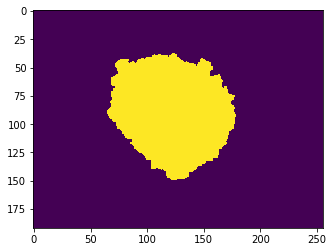

In [0]:
plt.imshow(train_img_y[1])

In [0]:
bce_loss = torch.nn.BCEWithLogitsLoss()

loss = bce_loss(unet(train_img_x[0].unsqueeze(0)).squeeze(0).squeeze(0), train_img_y[0])

print(loss.item())

0.7280790209770203


In [0]:
chota_train=train_img_x[:500]
chota_y=train_img_y[:500]

In [0]:
def get_batches(bs):
  for n in range(0,len(train_img_x)-1,bs):
    yield chota_train[n:n+bs],chota_y[n:n+bs]

In [0]:
def train_loop(model, epochs=1, lr=0.0001, bs=100, device='cuda'):
  model=model.to(device)
  optimizer = optim.Adam(model.parameters(), lr=lr)
  for epoch in range(epochs):
    loss_t=0
    for xb, yb in tqdm.tqdm(get_batches(bs=bs)):

      model.train()
      
      preds = model(xb.to(device))
      preds=preds.squeeze(1)
      print(preds.shape, yb.shape)
      loss = bce_loss(preds,yb.to(device))
      
      loss.backward()
      optimizer.step()
      optimizer.zero_grad_()
      
      loss_t += loss.detach()
      
    model.eval()
    ans=model(val_img_x)
    ans=ans.squeeze(0).squeeze(0)
    loss=bce_loss(ans,val_img_y)
    print("val_loss-{}".format(loss))
    print("train_loss-{}".format(loss_t))

In [0]:
train_loop(unet,3)

0it [00:00, ?it/s]


RuntimeError: ignored

In [0]:
import gc

In [0]:
total_size = 0

for obj in gc.get_objects():
  try:
    if torch.is_tensor(obj) and obj.is_cuda:
      print("%s:%s%s %s" % (type(obj).__name__, " GPU" if obj.is_cuda else ""," pinned" if obj.is_pinned else "",pretty_size(obj.size())))
      total_size += obj.numel()
    elif hasattr(obj, 'data') and torch.is_tensor(obj.data) and obj.is_cuda:
      print("%s → %s:%s%s%s%s %s" % (type(obj).__name__, type(obj.data).__name__, " GPU" if obj.is_cuda else ""," pinned" if obj.data.is_pinned else ""," grad" if obj.requires_grad else "", " volatile" if obj.volatile else "",pretty_size(obj.data.size())))
      total_size += obj.data.numel()
  except Exception as e:
    pass
  
  
#   try:
#     if torch.is_tensor(obj):
# 		  if not gpu_only or obj.is_cuda:
# 				print("%s:%s%s %s" % (type(obj).__name__, 
# 									  " GPU" if obj.is_cuda else "",
# 									  " pinned" if obj.is_pinned else "",
# 									  pretty_size(obj.size())))
# 				total_size += obj.numel()
# 			elif hasattr(obj, "data") and torch.is_tensor(obj.data):
# 			 if not gpu_only or obj.is_cuda:
# 					print("%s → %s:%s%s%s%s %s" % (type(obj).__name__, 
# 												   type(obj.data).__name__, 
# 												   " GPU" if obj.is_cuda else "",
# 												   " pinned" if obj.data.is_pinned else "",
# 												   " grad" if obj.requires_grad else "", 
# 												   " volatile" if obj.volatile else "",
# 												   pretty_size(obj.data.size())))
# 					total_size += obj.data.numel()
# 		except Exception as e:
# 			pass 

/usr/local/lib/python3.6/dist-packages/torch/distributed/distributed_c10d.py:100: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "


In [0]:
total_size

0